# **Single-Cell RNA-Seq Analysis Project**

In this project, you will work with the `norman` dataset from the `perturbation_data_analysis` exercise:

In [13]:
import os
import sys

# Append the root of the Git repository to the path.
git_root = os.popen(cmd="git rev-parse --show-toplevel").read().strip()
sys.path.append(git_root)


from src.exercises.perturbation_data_analysis import pertdata as pt  # noqa: E402

norman = pt.PertData.from_repo(name="norman", save_dir="data")

print(norman)



Dataset directory already exists: data\norman
Loading dataset: norman
PertData object
    name: norman
    path: data\norman
    adata: AnnData object with n_obs x n_vars = 91205 x 5045


In [14]:
adata = norman.adata
adata

AnnData object with n_obs × n_vars = 91205 × 5045
    obs: 'condition', 'cell_type', 'dose_val', 'control', 'condition_name', 'condition_fixed'
    var: 'gene_name'
    uns: 'non_dropout_gene_idx', 'non_zeros_gene_idx', 'rank_genes_groups_cov_all', 'top_non_dropout_de_20', 'top_non_zero_de_20'
    layers: 'counts'

In [15]:
adata.obs.head()

,condition,cell_type,dose_val,control,condition_name,condition_fixed
cell_barcode,,,,,,
AAACCTGAGGCATGTG-1,TSC22D1+ctrl,A549,1+1,0,A549_TSC22D1+ctrl_1+1,TSC22D1
AAACCTGAGGCCCTTG-1,KLF1+MAP2K6,A549,1+1,0,A549_KLF1+MAP2K6_1+1,KLF1+MAP2K6
AAACCTGCACGAAGCA-1,ctrl,A549,1,1,A549_ctrl_1,ctrl
AAACCTGCAGACGTAG-1,CEBPE+RUNX1T1,A549,1+1,0,A549_CEBPE+RUNX1T1_1+1,CEBPE+RUNX1T1
AAACCTGCAGCCTTGG-1,MAML2+ctrl,A549,1+1,0,A549_MAML2+ctrl_1+1,MAML2


In [16]:
adata.var.head()

,gene_name
gene_id,
ENSG00000239945,RP11-34P13.8
ENSG00000223764,RP11-54O7.3
ENSG00000187634,SAMD11
ENSG00000187642,PERM1
ENSG00000188290,HES4


In [17]:
print(adata.obs.columns.tolist())

['condition', 'cell_type', 'dose_val', 'control', 'condition_name', 'condition_fixed']


In [18]:
import scanpy as sc

# PCA (sparse-freundlich, kein scale)
sc.tl.pca(adata, svd_solver="randomized", zero_center=False)

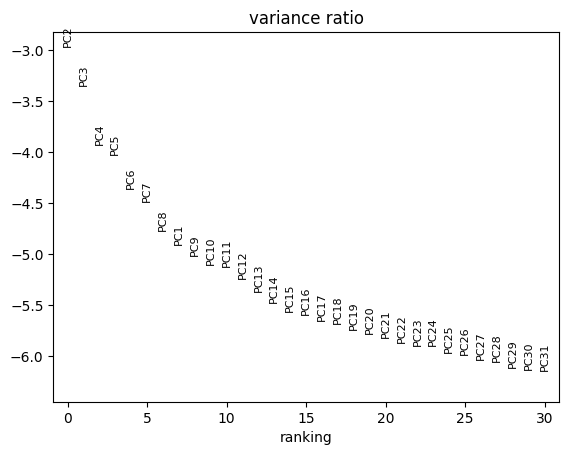

In [19]:
sc.pl.pca_variance_ratio(adata, log=True)

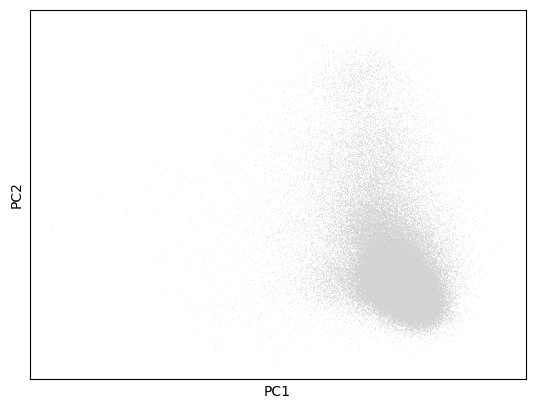

In [20]:
sc.pl.pca(adata)

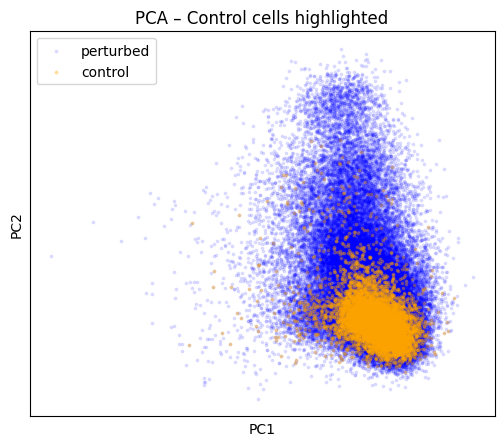

In [21]:
import matplotlib.pyplot as plt


X = adata.obsm["X_pca"][:, :2]
control_mask = adata.obs["control"] == 1

plt.figure(figsize=(6, 5))

# Hintergrund: alle Zellen
plt.scatter(
    X[:, 0], X[:, 1],
    s=3,
    c="blue",
    alpha=0.1,
    label="perturbed"
)

# Hervorheben: control
plt.scatter(
    X[control_mask, 0], X[control_mask, 1],
    s=3,
    c="orange",
    alpha=0.3,
    label="control"
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA – Control cells highlighted")
plt.legend()
plt.xticks([])
plt.yticks([])
plt.show()


In [22]:
adata.obs["control"].value_counts()

control
0    83852
1     7353
Name: count, dtype: int64

In [23]:
import pandas as pd


pc2_loadings = adata.varm["PCs"][:, 1]  # PC2
genes = adata.var_names

pc2_df = pd.DataFrame({
    "gene": genes,
    "loading": pc2_loadings
})


In [24]:
pc2_df.sort_values("loading", ascending=False).head(20)

,gene,loading
2740,ENSG00000251562,0.145165
94,ENSG00000142669,0.124935
2738,ENSG00000245532,0.121848
1753,ENSG00000227706,0.108616
1663,ENSG00000204482,0.098273
2892,ENSG00000026025,0.095947
1664,ENSG00000204472,0.094838
4670,ENSG00000011600,0.093531
1960,ENSG00000130429,0.087372
3772,ENSG00000198736,0.084317


In [25]:
pc2_df.sort_values("loading", ascending=True).head(20)

,gene,loading
4825,ENSG00000108106,-0.134808
4842,ENSG00000099901,-0.122453
852,ENSG00000187514,-0.119509
331,ENSG00000173207,-0.116425
4209,ENSG00000239672,-0.115619
50,ENSG00000116649,-0.112655
1316,ENSG00000164104,-0.106890
3758,ENSG00000130656,-0.103250
2526,ENSG00000119403,-0.099770
2934,ENSG00000165732,-0.098327


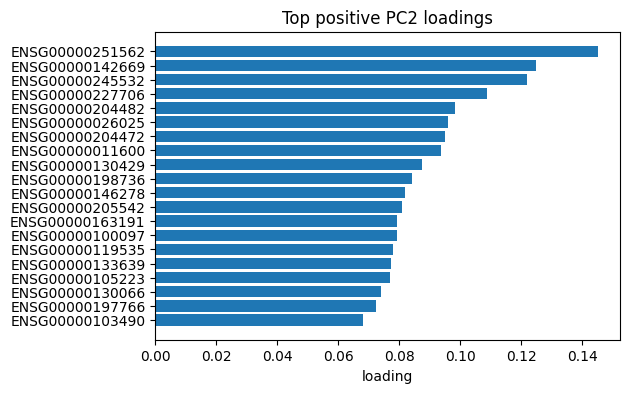

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.barh(top_pos["gene"][::-1], top_pos["loading"][::-1])
plt.title("Top positive PC2 loadings")
plt.xlabel("loading")
plt.show()


In [ ]:
sc.pl.pca(adata, color="condition")

In [ ]:
sc.pl.pca(adata, color="cell_type")

Choose one of the following tasks:

**Exploratory Data Analysis and Visualization**

- Objective: Explore the dataset to identify patterns and clusters.
- Tasks:
  - Perform dimensionality reduction using PCA, t-SNE, or UMAP.
  - Visualize gene expression profiles across different conditions or perturbations.
  - Create heatmaps of the top differentially expressed genes.
- Learning Outcomes:
  - Learn to visualize high-dimensional data.
  - Interpret clusters and patterns in the context of biological conditions.

**Machine Learning Classification**

- Objective: Build models to classify samples based on gene expression profiles.
- Tasks:
  - Split the dataset into training and testing sets.
  - Implement classification algorithms.
  - Evaluate model performance using metrics like accuracy, precision, recall, and ROC curves.
- Learning Outcomes:
  - Understand supervised learning techniques.
  - Learn model evaluation and validation strategies.

**Advanced Deep Learning Applications**

- Objective: Apply deep learning techniques to model complex patterns in the data.
- Tasks:
  - Implement autoencoders or variational autoencoders for dimensionality reduction.
  - Explore the use of GANs to generate synthetic gene expression data.
  - Analyze how deep learning models capture nonlinear relationships.
- Learning Outcomes:
  - Gain experience with deep learning frameworks.
  - Understand the applications of deep learning in genomics.